In [1]:
import requests
import json
from datetime import datetime
import pandas as pd
import seaborn as sns

headers = {'Content-type': 'application/json'}

start_year = 2010
end_year = datetime.now().year + 1

results_df = pd.DataFrame()

for year in range(start_year,end_year,1):

    print(year)
    
    period_start = year
    period_end = year + 1
        
    data = json.dumps({"seriesid": ['APU0000708111'],
                        "startyear" : period_start, 
                        "endyear":period_end})
    
    p = requests.post('https://api.bls.gov/publicAPI/v1/timeseries/data/', 
                        data=data, 
                        headers=headers)

    year_df = pd.DataFrame()

    json_data = json.loads(p.text)
    for series in json_data['Results']['series']:

        seriesId = series['seriesID']
        for item in series['data']:
            year = item['year']
            period = item['period']
            value = item['value']

            if 'M01' <= period <= 'M12':
                df = pd.DataFrame([[seriesId,year,period,value]])
                year_df = pd.concat([year_df,df])
    results_df = pd.concat([results_df,year_df])

2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025


In [2]:
results_df['month_num'] = results_df[2].str.replace("M","").astype(int)
results_df['date_fmt'] = pd.to_datetime(results_df[1].astype(str) + '-' + results_df['month_num'].astype(int).astype(str) + '-1', format = '%Y-%m')

<Axes: xlabel='date_fmt', ylabel='3'>

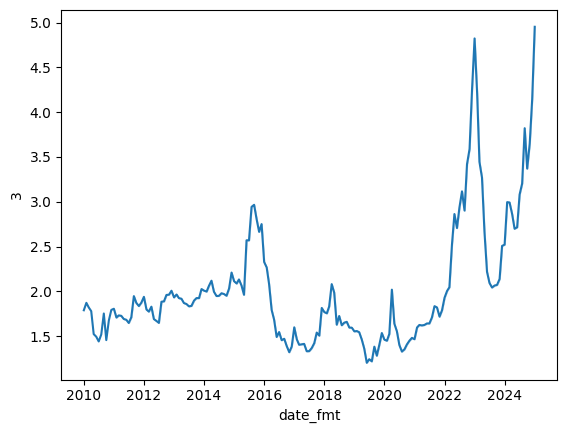

In [3]:
import seaborn as sns

sns.lineplot(results_df,x=results_df['date_fmt'],y=results_df[3].astype(float))

In [4]:
results_df

,0,1,2,3,month_num,date_fmt
0,APU0000708111,2011,M12,1.874,12,2011-12-01
0,APU0000708111,2011,M11,1.836,11,2011-11-01
0,APU0000708111,2011,M10,1.871,10,2011-10-01
0,APU0000708111,2011,M09,1.947,9,2011-09-01
0,APU0000708111,2011,M08,1.711,8,2011-08-01
...,...,...,...,...,...,...
0,APU0000708111,2024,M04,2.864,4,2024-04-01
0,APU0000708111,2024,M03,2.992,3,2024-03-01
0,APU0000708111,2024,M02,2.996,2,2024-02-01
0,APU0000708111,2024,M01,2.522,1,2024-01-01
